Задание 1 [4 балла].

Напишите функцию, на вход который поступает название города и которая выдает прогноз погоды на сегодня и завтра.
В прогноз включить температуру, осадки, влажность и скорость ветра.

In [1]:
import selenium.webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
# executable_path = 'C:\chromedriver'

In [2]:
def _get_weather(driver):
    info = {}
    WebDriverWait(driver, 20).until(\
              EC.visibility_of(\
                        driver.find_element(By.XPATH, "/html/body/section[2]/div[1]/section[2]/div/a[2]/div/div[1]/div[3]/div/div/div[1]/span[1]")))
    info["temp night"] = driver.find_element(By.XPATH, "/html/body/section[2]/div[1]/section[2]/div/a[2]/div/div[1]/div[3]/div/div/div[1]/span[1]").text
    info["temp day"] = driver.find_element(By.XPATH, "/html/body/section[2]/div[1]/section[2]/div/a[2]/div/div[1]/div[3]/div/div/div[2]/span[1]").text
    info["rainfall"] = driver.find_element(By.XPATH, "/html/body/section[2]/div[1]/section[3]/div/div/div/div[5]/div[5]/div[1]").text
    info["humidity"] = driver.find_element(By.XPATH, "/html/body/section[2]/div[1]/section[15]/div/div[3]/div/div[2]/div[5]").text
    info["wind"] = driver.find_element(By.XPATH, "/html/body/section[2]/div[1]/section[3]/div/div/div/div[4]/div[5]/span[1]").text
    return info
    
def get_weather(city:str):
    # URL to use in Selenium
    s=Service(ChromeDriverManager().install())
    driver = selenium.webdriver.Chrome(service=s)
    driver.get('https://www.gismeteo.ru/')
    driver.find_element(By.XPATH, "/html/body/header/div[2]/div[2]/div/div/div[1]/div/input").send_keys(city)
    WebDriverWait(driver, 1)
    driver.find_element(By.XPATH, "/html/body/header/div[2]/div[2]/div/div/div[1]/div/input").send_keys(Keys.RETURN)
    WebDriverWait(driver, 1)
    # element = WebDriverWait(driver, 20).until(\
              # EC.element_to_be_clickable((By.XPATH, "/html/body/section/div[1]/section[1]/div[1]/div/div[1]/a[1]")))
    # driver.find_element(By.XPATH, "/html/body/section/div[1]/section[1]/div[1]/div/div[1]/a[1]").click()
    info = {}
    info["today"] = _get_weather(driver)
    driver.find_element(By.XPATH, "/html/body/header/div[2]/div[2]/div/div[2]/div/a[2]").click()
    info["tomorrow"] = _get_weather(driver)
    print(f"Погода в городе {city}\nСегодня: {info['today']}\nЗавтра: {info['tomorrow']}")

In [ ]:
get_weather("Москва")

TypeError: __init__() got an unexpected keyword argument 'service'

Задание 2 [2 балла].

Воспользуйтесь рейтингом фильмов - https://www.imdb.com/chart/top
Выгрузите ранг фильма, название, год и рейтинг.
1. Определите самое успешное десятилетие на основе среднего и максимального рейтинга фильмов (например, десятилетием является период 2010-2019 включительно). Постройте график.
2. Выведите таблицу в формате: Десятилетие - Самый успешый фильм этого десятилетия

In [4]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [5]:
# IMDB's homepage
imdb_url = 'https://www.imdb.com/chart/top'

# Use requests to retrieve data from a given URL
imdb_response = requests.get(imdb_url)

# Parse the whole HTML page using BeautifulSoup
imdb_soup = BeautifulSoup(imdb_response.text, 'html.parser')

In [6]:
movies = imdb_soup.find_all('td', {'class': 'titleColumn'})
years = [movie.find('span').text[1:-1] for movie in movies]
movies = [movie.find('a').text for movie in movies]

ratings = imdb_soup.find_all('td', {'class': 'ratingColumn imdbRating'})
ratings = [rating.find('strong').text for rating in ratings]

data = pd.DataFrame()
data['movie'] = movies
data['movie'] = data['movie'].astype(str)
data['year'] = years
data['year'] = data['year'].astype(int)
data['rating'] = ratings
data['rating'] = data['rating'].astype(float)
data

,movie,year,rating
0,Побег из Шоушенка,1994,9.2
1,Крёстный отец,1972,9.2
2,Темный рыцарь,2008,9.0
3,Крёстный отец 2,1974,9.0
4,12 рaзгневанных мужчин,1957,9.0
...,...,...,...
245,Дерсу Узала,1975,8.0
246,Прислуга,2011,8.0
247,Аладдин,1992,8.0
248,Ганди,1982,8.0


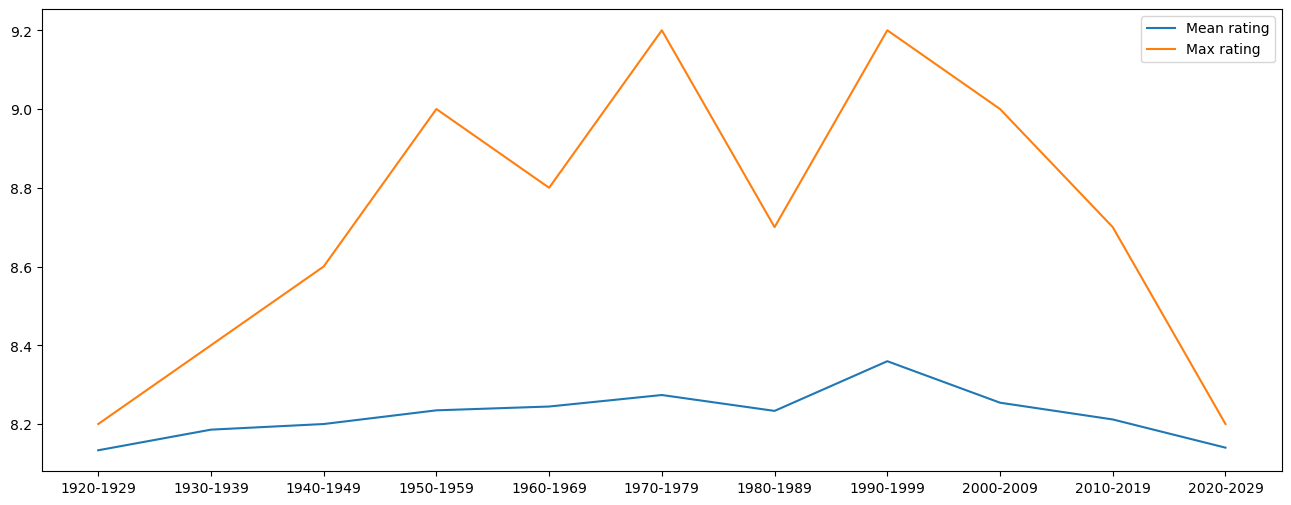

In [7]:
_start = (data.year.min()//10*10)
_end = ((data.year.max()//10+1)*10-1)
x,mean, mx = [],[],[]
for i in range(_start, _end, 10):
    x.append(str(i) + '-' + str(i+9))
    sm=[]
    for j in range(data.shape[0]):
        row = data.iloc[j]
        if (row.year >= i and row.year<i+10):
            sm.append(row.rating)
    mx.append(max(sm))
    mean.append(np.mean(sm))

plt.figure(figsize=(16,6))
plt.plot(x, mean, label='Mean rating')
plt.plot(x, mx, label='Max rating')
plt.legend()
plt.show()

In [8]:
print(f"Самое успешное десятилетие на основе среднего рейтинга: {x[np.argmax(mean)]}")
print(f"Самое успешное десятилетие на основе максимального рейтинга: {x[np.argmax(mx)]}")

Самое успешное десятилетие на основе среднего рейтинга: 1990-1999
Самое успешное десятилетие на основе максимального рейтинга: 1970-1979


In [9]:
x, y = [], []
for i in range(_start, _end, 10):
    x.append(str(i) + '-' + str(i+9))
    nm=''
    r=-1
    for j in range(data.shape[0]):
        row = data.iloc[j]
        if (row.year >= i and row.year<i+10 and row.rating>r):
            nm = row.movie
            r = row.rating
    y.append(nm)
tops = pd.DataFrame()
tops['decade'] = x
tops['best movie'] = y
tops

,decade,best movie
0,1920-1929,Метрополис
1,1930-1939,Новые времена
2,1940-1949,Эта замечательная жизнь
3,1950-1959,12 рaзгневанных мужчин
4,1960-1969,"Хороший, плохой, злой"
5,1970-1979,Крёстный отец
6,1980-1989,Звёздные войны. Эпизод 5: Империя наносит отве...
7,1990-1999,Побег из Шоушенка
8,2000-2009,Темный рыцарь
9,2010-2019,Начало


Задание 3 [4 балла].

Напишите скрипт, который будет нажимать на случайную внутреннюю ссылку на странице Википедии. Внутренней считается ссылка, которая ссылается на какую-то другую статью Википедии.
Ссылка должна быть из основного информационного блока. Функциональные ссылки из верхнего, бокового и нижнего меню в этой процедуре участвовать не должны.

На вход функции поступает число повторений этой процедуры. Переходы не прерываются, то есть при переходе на следующую статью следующая ссылка выбирается именно среди ссылок этой статьи.

Выведите путь (последовательность) по названиям статей, которые встретились в процессе перехода по страницам.

In [10]:
from random import randint

def dfs(driver, n:int):
    banned_tokens = ["#cite_note", "Citation_needed", "File:", "Edit section:"]
    for i in range(n):
        print(str(i+1) + "#", driver.find_element(By.XPATH, '//*[@id="firstHeading"]').text)
    
        elements = driver.find_elements(By.CSS_SELECTOR, "div.vector-body p a")
        l = []
        for element in elements:
            href = element.get_attribute("href")
            flag=True
            for token in banned_tokens:
                if(token in href): flag=False
            if(flag): l.append(element)
        if(len(l)==0):
            print("Empty page, abort")
            return
        el = l[randint(0, len(l)-1)]
        el.click()

s=Service(ChromeDriverManager().install())
driver = selenium.webdriver.Chrome(service=s)
driver.get('https://en.wikipedia.org/wiki/Special:Random')

dfs(driver, 10)

1# John Clark (Delaware governor)
2# Smyrna, Delaware
3# Race and ethnicity in the United States census
4# Self-concept
5# Carl Rogers
6# Person-centered therapy
7# Unconditional positive regard
8# Humanistic psychology
9# Psychology
10# Psychological operations (United States)
